# BoomBikes Bike Sharing Assignment

## Problem Statement

- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.



- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 



- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.



- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    * Which variables are significant in predicting the demand for shared bikes.
    * How well those variables describe the bike demands


- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

The steps that we will follow are divided into the following sections:

-  Data Understanding and exploration
-  Data Visualisation
-  Data Preparation
-  Model building and evaluation

----

## Step 1: Data Understanding and exploration

In [97]:
#importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset and Understanding Data

In [98]:
boombikes_df = pd.read_csv('day.csv')
boombikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [99]:
boombikes_df.shape

(730, 16)

In [100]:
boombikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [101]:
boombikes_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [102]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

### Cleaning Data

In [103]:
# Dropping the columns that are not significant for our analysis

boombikes_df = boombikes_df.drop('instant',axis=1)
boombikes_df = boombikes_df.drop('dteday',axis=1)

In [104]:
boombikes_df = boombikes_df.drop('casual',axis=1)
boombikes_df = boombikes_df.drop('registered',axis=1)

In [105]:
boombikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


----

## Step 2: Visualizing the data

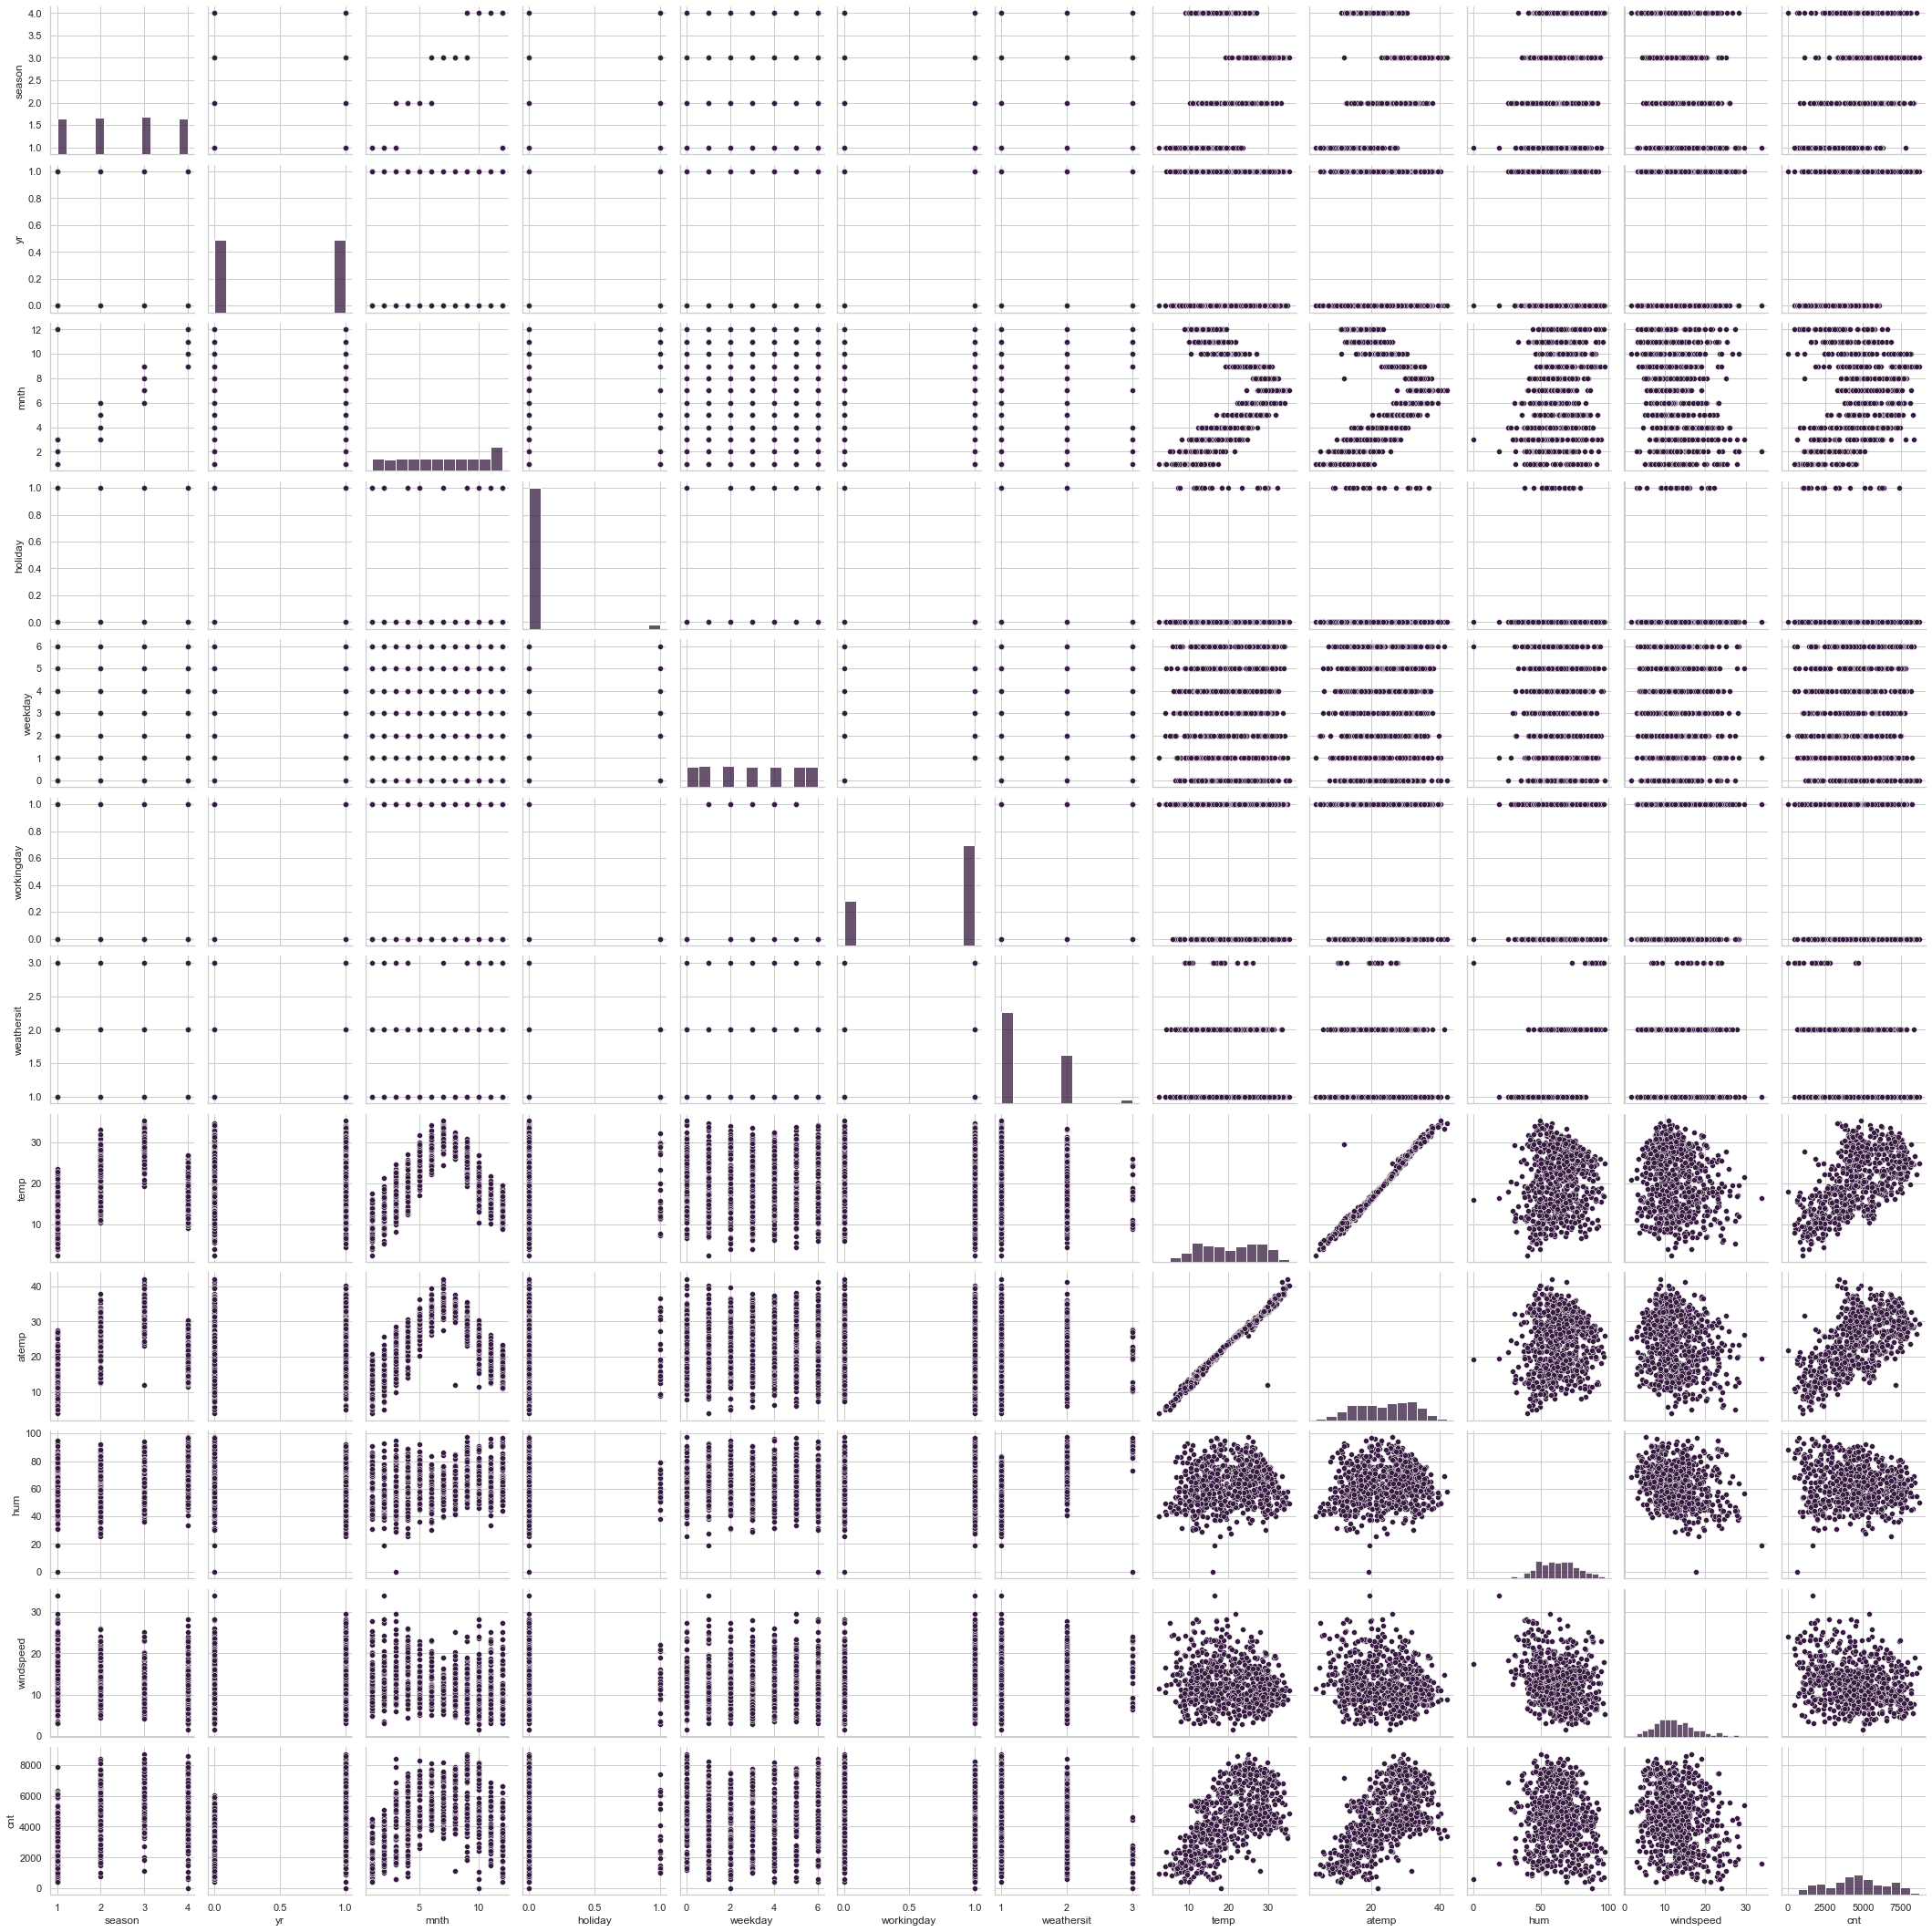

In [106]:
sns.set_theme(style="whitegrid", palette="rocket")
sns.pairplot(boombikes_df)
plt.show()

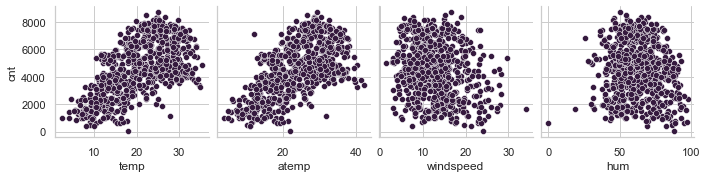

In [107]:
# Visualising the numerical variables via scatter plots
sns.set_theme(style="whitegrid", palette="rocket")
sns.pairplot(data=boombikes_df,
            x_vars=['temp','atemp','windspeed','hum'],
            y_vars='cnt')

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

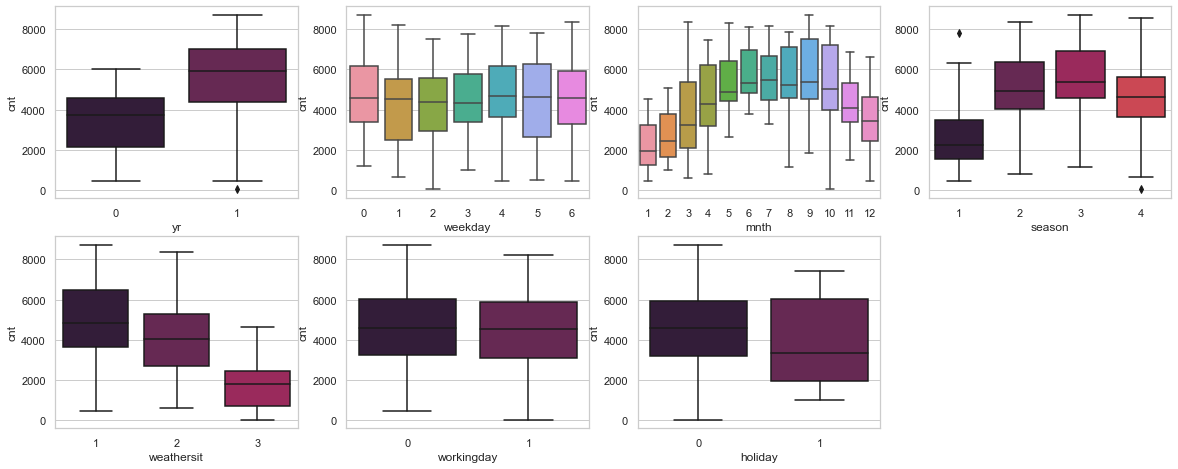

In [108]:
# visualising the categorical variables via box plots
sns.set_theme(style="whitegrid", palette="rocket")
plt.figure(figsize=(20,12))
plt.subplot(3,4,1)
sns.boxplot(x='yr',y='cnt',data=boombikes_df)
plt.subplot(3,4,3)
sns.boxplot(x='mnth',y='cnt',data=boombikes_df)
plt.subplot(3,4,4)
sns.boxplot(x='season',y='cnt',data=boombikes_df)
plt.subplot(3,4,2)
sns.boxplot(x='weekday',y='cnt',data=boombikes_df)
plt.subplot(3,4,6)
sns.boxplot(x='workingday',y='cnt',data=boombikes_df)
plt.subplot(3,4,7)
sns.boxplot(x='holiday',y='cnt',data=boombikes_df)
plt.subplot(3,4,5)
sns.boxplot(x='weathersit',y='cnt',data=boombikes_df)

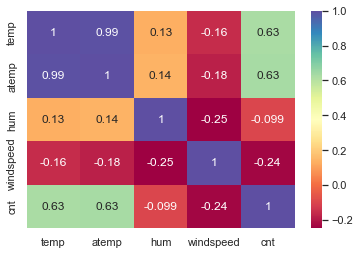

In [109]:
# Checking continuous variables relationship with each other

sns.heatmap(boombikes_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='Spectral', annot = True)
plt.show()

#### From the above correlation map, temp, atemp seems to be highly correlated. We see that the Target variable has a linear relationship with some of the  independent variables which is a good sign for building a linear regression Model.

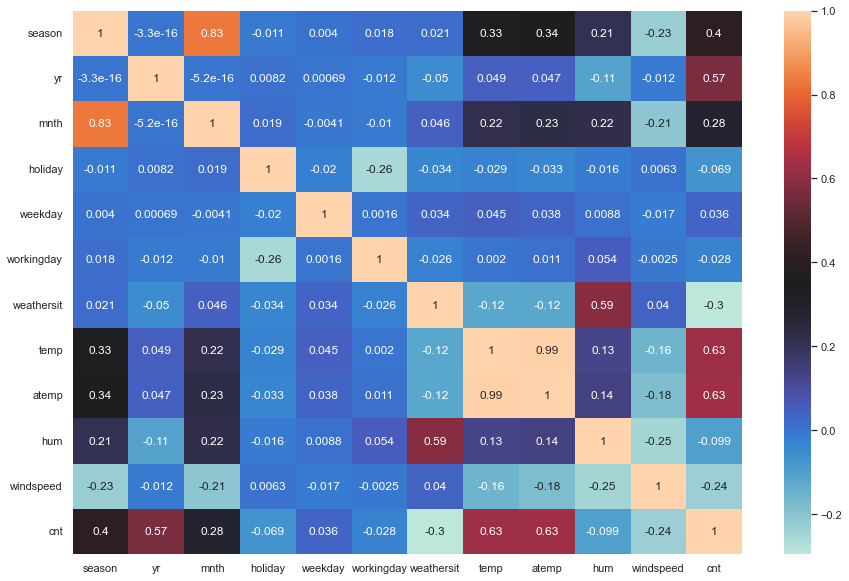

In [110]:
# Checking the correlation for numeric variables

fig, ax = plt.subplots(figsize=(15,10)) 
cor = boombikes_df.corr()
ax = sns.heatmap(cor, cmap="icefire", annot = True)
plt.show()

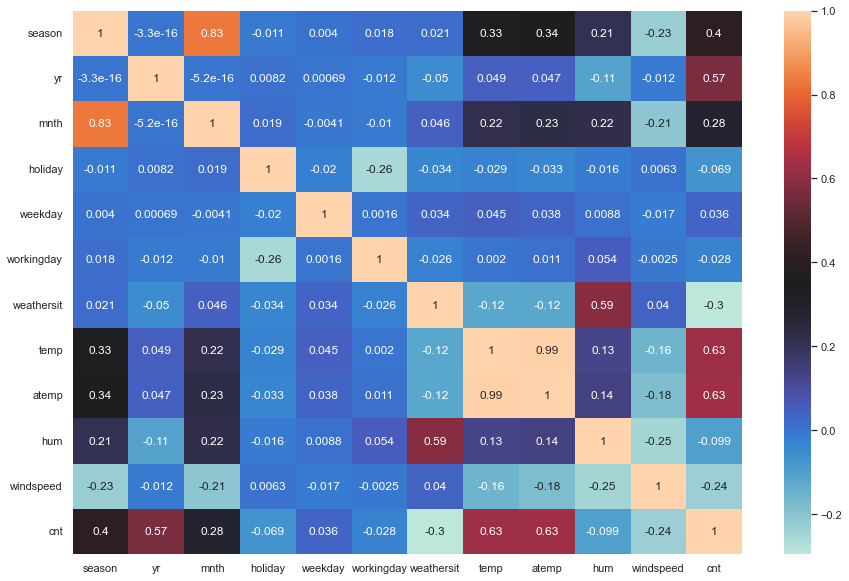

In [112]:
#Calculating Correlation between variables

corr = boombikes_df.corr()
plt.figure(figsize=(15,10))

#Drawing heatmap for the correlation
sns.heatmap(corr,annot=True, cmap='icefire' )
plt.show()

#### Now, we will convert columns like season and weathersit into strings before starting with data modelling. Example, various columns have values such as 1, 2, 3, 4. Conversion to strings is done so that after dummy variable creation, column data is easily identified.

In [113]:
# Assigning string values to different season instead of numeric values.

boombikes_df.loc[boombikes_df['season']==1,'season'] = 'spring'
boombikes_df.loc[boombikes_df['season']==2,'season'] = 'summer'
boombikes_df.loc[boombikes_df['season']==3,'season'] = 'fall'
boombikes_df.loc[boombikes_df['season']==4,'season'] = 'winter'

In [114]:
boombikes_df.loc[boombikes_df['weathersit']==1,'weathersit'] = 'clear'
boombikes_df.loc[boombikes_df['weathersit']==2,'weathersit'] = 'mist'
boombikes_df.loc[boombikes_df['weathersit']==3,'weathersit'] = 'light snow'
boombikes_df.loc[boombikes_df['weathersit']==4,'weathersit'] = 'heavy rain'
boombikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [115]:
boombikes_df['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [116]:
boombikes_df['season'].sample(5)

651    winter
0      spring
342    winter
530    summer
315    winter
Name: season, dtype: object

In [117]:
boombikes_df['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [118]:
# Assigning string values to different months instead of numeric values.

def object_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

boombikes_df[['mnth']] = boombikes_df[['mnth']].apply(object_map)

----

## Step 3: Data Preparation

#### Create dummy variables for all categorical variables

In [119]:
season_dummies = pd.get_dummies(boombikes_df['season'], drop_first=True)
season_dummies.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [120]:
weathersit_dummies = pd.get_dummies(boombikes_df['weathersit'], drop_first=True)
weathersit_dummies.head()

,light snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [121]:
mnth_dummies = pd.get_dummies(boombikes_df['mnth'], drop_first=True)
mnth_dummies.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


Concatenate the above created dummy variables with the original 'boombikes_df' data frame.

In [122]:
boombikes_df = pd.concat([boombikes_df,season_dummies,weathersit_dummies,mnth_dummies],axis=1)
boombikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,1,1,mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,2,1,mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,3,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,4,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,5,1,clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


We can drop the original season, weathersit and mnth columns now that their dummy variables are present.

In [123]:
boombikes_df = boombikes_df.drop('season', axis=1)
boombikes_df = boombikes_df.drop('weathersit', axis=1)
boombikes_df = boombikes_df.drop('mnth', axis=1)

boombikes_df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


----

## Step 4: Model Building and Evaluation

#### Splitting the data into training and test splits

In [124]:
boombikes_df_train, boombikes_df_test = train_test_split(boombikes_df,train_size=0.7,random_state=100)
print(boombikes_df_train.shape)
print(boombikes_df_test.shape)

(510, 25)
(220, 25)


In [125]:
boombikes_df_train

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,3,1,29.246653,33.14480,70.4167,11.083475,7216,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,1,10.489153,11.58500,48.3333,23.500518,1796,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,13.803347,16.09770,72.9583,14.707907,1683,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,5,1,30.852500,35.35440,65.9583,8.666718,7261,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,5,1,9.091299,12.28585,42.3043,6.305571,1917,1,...,0,1,0,0,0,0,0,0,0,0
350,0,0,1,1,10.591653,12.46855,56.0833,16.292189,2739,0,...,1,0,0,0,0,0,0,0,0,0
79,0,0,3,1,17.647835,20.48675,73.7391,19.348461,2077,0,...,0,0,0,0,0,1,0,0,0,0


### Rescaling the data

- We will be using MinMaxScaler here for our testing instead of Standardization

In [126]:
scaler = MinMaxScaler()
num_var = ['temp', 'atemp','hum', 'windspeed', 'cnt']

In [127]:
# Fitting the list of numeric variables on the data
boombikes_df_train[num_var] = scaler.fit_transform(boombikes_df_train[num_var])
boombikes_df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,3,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,...,0,0,0,0,0,0,0,0,0,0


Above we can see that the numerical columns are converted to a scale between 0 to 1 which means that the MinMaxScaling has been done properly.

In [128]:
boombikes_df_train[num_var].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### We'll now train the data.

Starting with the heatmap to see correlations.

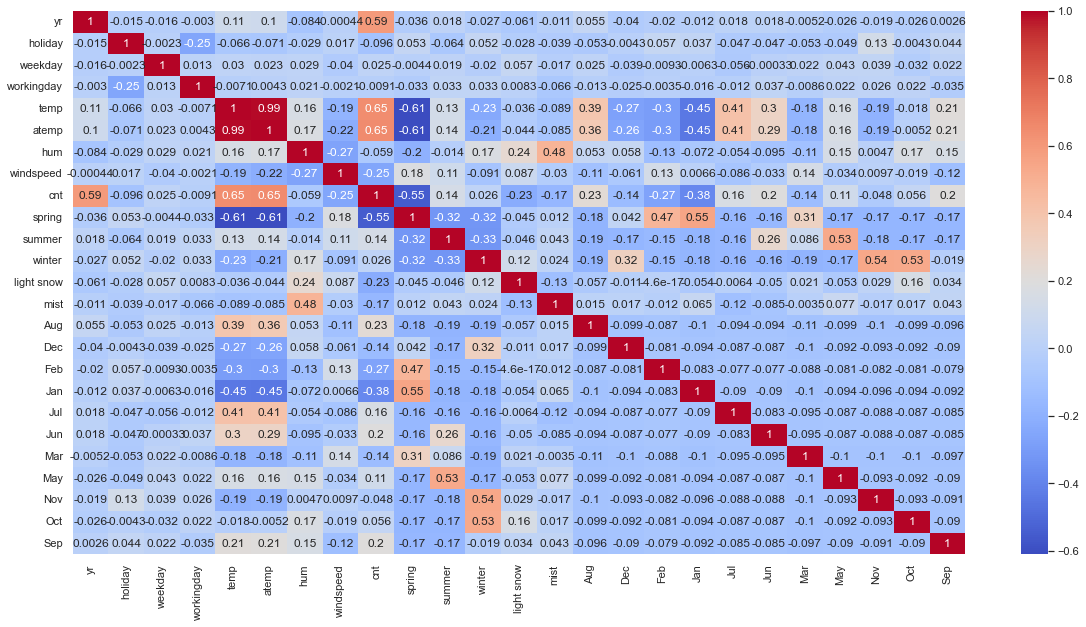

In [129]:
fig,ax = plt.subplots(figsize=(20,10))
cor = boombikes_df_train.corr()
ax = sns.heatmap(cor, annot = True, cmap = "coolwarm")
plt.show()

In [130]:
# We'll prepare the Training Dataset

# y_train to only contain the target variable
y_train = boombikes_df_train.pop('cnt')

# X_train will contain all the remaining variables, including our independent variables except 'cnt'
X_train = boombikes_df_train

print(X_train.shape)
y_train.sample(5)

(510, 24)


636    0.981707
324    0.315578
74     0.249655
443    0.698458
38     0.173493
Name: cnt, dtype: float64

In [131]:
X_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,3,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,1,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,...,0,0,0,0,0,0,0,0,0,0


In [132]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

We have imported the linear regression library at the top, now we will create our first model.

In [134]:
X_train_sm = sm.add_constant(X_train['temp'])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.46e-61
Time:                        21:43:37   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above table shows an adjusted R-squared of 41.5% which means 41.5% variation in 'cnt' is determined by 'temp'.
p-value for both temp is 0, showing that temp is perfectly linearly related with cnt.
We have to keep in mind that this is in the absence of other variables.
In actuality, we have to consider other fearures as well for better model building which we will do later.

Adding 'atemp' to the model. Also, adding a constant.

In [135]:
X_train_sm = sm.add_constant(X_train[['temp','atemp']])

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 09 May 2022   Prob (F-statistic):           8.38e-61
Time:                        21:44:28   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value for temp shows to be 0.426. Since temp is an important variable, we will not remove it but build another model by adding in a new variable.

In [136]:
X_train_sm = sm.add_constant(X_train[['temp','atemp','yr']]) # Adding 'yr' to the model

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     388.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          9.71e-131
Time:                        21:44:51   Log-Likelihood:                 343.36
No. Observations:                 510   AIC:                            -678.7
Df Residuals:                     506   BIC:                            -661.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.015      4.813      0.000       0.043       0.101
temp           0.0798      0.169      0.473      0.636      -0.252       0.411
atemp          0.5420      0.179      3.024      0.003       0.190       0.894
yr             0.2372      0.011     21.485      0.000       0.216       0.259
==============================================================================
Omnibus:                       38.557   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.381
Skew:                          -0.555   Prob(JB):                     3.47e-13
Kurtosis:                       4.212   Cond. No.                         61.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that p-value has increased for temp. We will add all columns and then see the effect of each on 'cnt'

In [137]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     113.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.16e-181
Time:                        21:44:55   Log-Likelihood:                 519.84
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     485   BIC:                            -883.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3329      0.044      7.495      0.000       0.246       0.420
yr             0.2317      0.008     28.469      0.000       0.216       0.248
holiday       -0.1010      0.027     -3.786      0.000      -0.153      -0.049
weekday        0.0024      0.002      1.193      0.233      -0.002       0.006
workingday    -0.0194      0.009     -2.115      0.035      -0.037      -0.001
temp           0.3834      0.144      2.670      0.008       0.101       0.666
atemp          0.0651      0.139      0.466      0.641      -0.209       0.339
hum           -0.1617      0.039     -4.159      0.000      -0.238      -0.085
windspeed     -0.1826      0.027     -6.849      0.000      -0.235      -0.130
spring        -0.0453      0.030     -1.499      0.135      -0.105       0.014
summer         0.0439      0.026      1.660      0.098      -0.008       0.096
winter         0.1084      0.028      3.842      0.000       0.053       0.164
light snow    -0.2489      0.027     -9.357      0.000      -0.301      -0.197
mist          -0.0571      0.011     -5.422      0.000      -0.078      -0.036
Aug            0.0265      0.034      0.775      0.439      -0.041       0.094
Dec           -0.0415      0.034     -1.223      0.222      -0.108       0.025
Feb           -0.0318      0.033     -0.955      0.340      -0.097       0.034
Jan           -0.0600      0.034     -1.768      0.078      -0.127       0.007
Jul           -0.0318      0.035     -0.899      0.369      -0.101       0.038
Jun            0.0078      0.025      0.308      0.758      -0.042       0.057
Mar            0.0044      0.025      0.177      0.859      -0.044       0.053
May            0.0263      0.021      1.233      0.218      -0.016       0.068
Nov           -0.0391      0.037     -1.064      0.288      -0.111       0.033
Oct            0.0066      0.036      0.183      0.855      -0.065       0.078
Sep            0.0905      0.032      2.803      0.005       0.027       0.154
==============================================================================
Omnibus:                       76.593   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.777
Skew:                          -0.762   Prob(JB):                     8.35e-43
Kurtosis:                       5.607   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,435.78
5,atemp,381.68
6,hum,37.95
8,spring,11.69
10,winter,11.63
9,summer,6.79
22,Oct,6.26
21,Nov,6.08
13,Aug,5.88
7,windspeed,5.34


We know that features are dropped in the following order: 

- High p-value, low VIF
- High p-value, high VIF
- Low p-value, high VIF

We will drop features accordingly and keep those with low p-value and low VIF.

In [139]:
X_train_A = X_train.drop('Mar', axis=1)

In [140]:
X_train_sm = sm.add_constant(X_train_A)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     118.2
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.99e-182
Time:                        21:45:27   Log-Likelihood:                 519.82
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     486   BIC:                            -890.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3358      0.041      8.103      0.000       0.254       0.417
yr             0.2317      0.008     28.497      0.000       0.216       0.248
holiday       -0.1011      0.027     -3.794      0.000      -0.153      -0.049
weekday        0.0024      0.002      1.199      0.231      -0.002       0.006
workingday    -0.0194      0.009     -2.120      0.034      -0.037      -0.001
temp           0.3825      0.143      2.668      0.008       0.101       0.664
atemp          0.0645      0.139      0.463      0.643      -0.209       0.338
hum           -0.1612      0.039     -4.162      0.000      -0.237      -0.085
windspeed     -0.1828      0.027     -6.875      0.000      -0.235      -0.131
spring        -0.0436      0.029     -1.524      0.128      -0.100       0.013
summer         0.0430      0.026      1.659      0.098      -0.008       0.094
winter         0.1094      0.028      3.947      0.000       0.055       0.164
light snow    -0.2489      0.027     -9.366      0.000      -0.301      -0.197
mist          -0.0571      0.011     -5.430      0.000      -0.078      -0.036
Aug            0.0245      0.032      0.761      0.447      -0.039       0.088
Dec           -0.0453      0.026     -1.728      0.085      -0.097       0.006
Feb           -0.0361      0.022     -1.607      0.109      -0.080       0.008
Jan           -0.0644      0.023     -2.853      0.005      -0.109      -0.020
Jul           -0.0337      0.034     -1.002      0.317      -0.100       0.032
Jun            0.0063      0.024      0.266      0.791      -0.041       0.053
May            0.0250      0.020      1.252      0.211      -0.014       0.064
Nov           -0.0425      0.031     -1.370      0.171      -0.104       0.018
Oct            0.0033      0.031      0.106      0.915      -0.058       0.064
Sep            0.0881      0.029      3.010      0.003       0.031       0.146
==============================================================================
Omnibus:                       76.477   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.172
Skew:                          -0.759   Prob(JB):                     6.85e-43
Kurtosis:                       5.614   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
vif = pd.DataFrame()
vif['Features'] = X_train_A.columns
vif['VIF'] = [variance_inflation_factor(X_train_A.values, i) for i in range (X_train_A.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,435.57
5,atemp,381.50
6,hum,36.02
10,winter,10.49
8,spring,8.11
9,summer,6.78
13,Aug,5.60
7,windspeed,5.31
17,Jul,4.99
21,Oct,4.97


In [143]:
X_train_B = X_train_A.drop('Oct',axis=1)

In [144]:
X_train_sm = sm.add_constant(X_train_B)


lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.78e-183
Time:                        21:46:03   Log-Likelihood:                 519.82
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     487   BIC:                            -896.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3366      0.041      8.280      0.000       0.257       0.416
yr             0.2316      0.008     28.553      0.000       0.216       0.248
holiday       -0.1009      0.027     -3.799      0.000      -0.153      -0.049
weekday        0.0024      0.002      1.199      0.231      -0.002       0.006
workingday    -0.0194      0.009     -2.123      0.034      -0.037      -0.001
temp           0.3828      0.143      2.673      0.008       0.101       0.664
atemp          0.0646      0.139      0.464      0.643      -0.209       0.338
hum           -0.1608      0.039     -4.175      0.000      -0.236      -0.085
windspeed     -0.1827      0.027     -6.882      0.000      -0.235      -0.131
spring        -0.0442      0.028     -1.579      0.115      -0.099       0.011
summer         0.0419      0.024      1.751      0.081      -0.005       0.089
winter         0.1107      0.024      4.528      0.000       0.063       0.159
light snow    -0.2488      0.027     -9.376      0.000      -0.301      -0.197
mist          -0.0572      0.011     -5.440      0.000      -0.078      -0.037
Aug            0.0232      0.030      0.780      0.436      -0.035       0.081
Dec           -0.0473      0.019     -2.544      0.011      -0.084      -0.011
Feb           -0.0367      0.022     -1.676      0.094      -0.080       0.006
Jan           -0.0650      0.022     -2.948      0.003      -0.108      -0.022
Jul           -0.0351      0.031     -1.121      0.263      -0.097       0.026
Jun            0.0057      0.023      0.247      0.805      -0.040       0.051
May            0.0248      0.020      1.249      0.212      -0.014       0.064
Nov           -0.0451      0.019     -2.353      0.019      -0.083      -0.007
Sep            0.0865      0.025      3.458      0.001       0.037       0.136
==============================================================================
Omnibus:                       76.104   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.544
Skew:                          -0.757   Prob(JB):                     1.55e-42
Kurtosis:                       5.602   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
vif = pd.DataFrame()
vif['Features'] = X_train_B.columns
vif['VIF'] = [variance_inflation_factor(X_train_B.values, i) for i in range (X_train_B.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,434.61
5,atemp,381.50
6,hum,34.77
8,spring,8.01
10,winter,6.87
9,summer,6.00
7,windspeed,5.25
13,Aug,4.93
17,Jul,4.45
3,workingday,3.73


In [147]:
X_train_C = X_train_B.drop('Jun', axis=1)

In [148]:
X_train_sm = sm.add_constant(X_train_C)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.59e-184
Time:                        21:46:42   Log-Likelihood:                 519.79
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     488   BIC:                            -902.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3371      0.041      8.309      0.000       0.257       0.417
yr             0.2314      0.008     28.681      0.000       0.216       0.247
holiday       -0.1014      0.026     -3.827      0.000      -0.153      -0.049
weekday        0.0024      0.002      1.189      0.235      -0.002       0.006
workingday    -0.0193      0.009     -2.116      0.035      -0.037      -0.001
temp           0.3935      0.136      2.883      0.004       0.125       0.662
atemp          0.0598      0.138      0.434      0.664      -0.211       0.330
hum           -0.1620      0.038     -4.250      0.000      -0.237      -0.087
windspeed     -0.1836      0.026     -6.986      0.000      -0.235      -0.132
spring        -0.0461      0.027     -1.707      0.088      -0.099       0.007
summer         0.0410      0.024      1.735      0.083      -0.005       0.087
winter         0.1087      0.023      4.722      0.000       0.063       0.154
light snow    -0.2488      0.027     -9.383      0.000      -0.301      -0.197
mist          -0.0570      0.010     -5.440      0.000      -0.078      -0.036
Aug            0.0188      0.024      0.786      0.432      -0.028       0.066
Dec           -0.0467      0.018     -2.537      0.011      -0.083      -0.011
Feb           -0.0359      0.022     -1.659      0.098      -0.078       0.007
Jan           -0.0638      0.021     -2.968      0.003      -0.106      -0.022
Jul           -0.0397      0.025     -1.595      0.111      -0.089       0.009
May            0.0225      0.018      1.284      0.200      -0.012       0.057
Nov           -0.0448      0.019     -2.343      0.020      -0.082      -0.007
Sep            0.0834      0.022      3.850      0.000       0.041       0.126
==============================================================================
Omnibus:                       75.608   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.647
Skew:                          -0.755   Prob(JB):                     6.59e-42
Kurtosis:                       5.577   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train_C.columns
vif['VIF'] = [variance_inflation_factor(X_train_C.values, i) for i in range (X_train_C.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,392.40
5,atemp,374.15
6,hum,34.23
8,spring,7.32
10,winter,5.96
9,summer,5.85
7,windspeed,5.17
3,workingday,3.72
2,weekday,3.25
13,Aug,3.13


In [150]:
X_train_D = X_train_C.drop('atemp',axis=1)

In [151]:
X_train_sm = sm.add_constant(X_train_D)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.47e-185
Time:                        21:47:11   Log-Likelihood:                 519.69
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     489   BIC:                            -908.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3369      0.041      8.312      0.000       0.257       0.417
yr             0.2314      0.008     28.702      0.000       0.216       0.247
holiday       -0.1016      0.026     -3.843      0.000      -0.154      -0.050
weekday        0.0024      0.002      1.168      0.243      -0.002       0.006
workingday    -0.0191      0.009     -2.095      0.037      -0.037      -0.001
temp           0.4502      0.039     11.597      0.000       0.374       0.527
hum           -0.1612      0.038     -4.237      0.000      -0.236      -0.086
windspeed     -0.1859      0.026     -7.224      0.000      -0.236      -0.135
spring        -0.0452      0.027     -1.681      0.093      -0.098       0.008
summer         0.0419      0.023      1.784      0.075      -0.004       0.088
winter         0.1097      0.023      4.793      0.000       0.065       0.155
light snow    -0.2496      0.026     -9.444      0.000      -0.302      -0.198
mist          -0.0571      0.010     -5.453      0.000      -0.078      -0.037
Aug            0.0180      0.024      0.755      0.450      -0.029       0.065
Dec           -0.0466      0.018     -2.535      0.012      -0.083      -0.010
Feb           -0.0360      0.022     -1.664      0.097      -0.078       0.007
Jan           -0.0640      0.021     -2.983      0.003      -0.106      -0.022
Jul           -0.0398      0.025     -1.598      0.111      -0.089       0.009
May            0.0222      0.017      1.270      0.205      -0.012       0.057
Nov           -0.0447      0.019     -2.341      0.020      -0.082      -0.007
Sep            0.0834      0.022      3.855      0.000       0.041       0.126
==============================================================================
Omnibus:                       74.873   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.487
Skew:                          -0.749   Prob(JB):                     1.94e-41
Kurtosis:                       5.565   Cond. No.                         59.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train_D.columns
vif['VIF'] = [variance_inflation_factor(X_train_D.values, i) for i in range (X_train_D.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
5,hum,34.14
4,temp,21.79
7,spring,7.27
9,winter,5.89
8,summer,5.78
6,windspeed,4.93
3,workingday,3.71
2,weekday,3.24
12,Aug,3.11
16,Jul,2.77


In [153]:
X_train_E = X_train_D.drop('Aug',axis=1)

In [154]:
X_train_sm = sm.add_constant(X_train_E)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.60e-186
Time:                        21:47:38   Log-Likelihood:                 519.39
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     490   BIC:                            -914.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3471      0.038      9.092      0.000       0.272       0.422
yr             0.2315      0.008     28.746      0.000       0.216       0.247
holiday       -0.1022      0.026     -3.867      0.000      -0.154      -0.050
weekday        0.0024      0.002      1.165      0.244      -0.002       0.006
workingday    -0.0192      0.009     -2.108      0.036      -0.037      -0.001
temp           0.4524      0.039     11.687      0.000       0.376       0.528
hum           -0.1600      0.038     -4.210      0.000      -0.235      -0.085
windspeed     -0.1860      0.026     -7.234      0.000      -0.237      -0.136
spring        -0.0567      0.022     -2.561      0.011      -0.100      -0.013
summer         0.0297      0.017      1.740      0.083      -0.004       0.063
winter         0.0991      0.018      5.499      0.000       0.064       0.134
light snow    -0.2505      0.026     -9.495      0.000      -0.302      -0.199
mist          -0.0568      0.010     -5.431      0.000      -0.077      -0.036
Dec           -0.0475      0.018     -2.590      0.010      -0.083      -0.011
Feb           -0.0360      0.022     -1.665      0.097      -0.078       0.006
Jan           -0.0640      0.021     -2.983      0.003      -0.106      -0.022
Jul           -0.0526      0.018     -2.892      0.004      -0.088      -0.017
May            0.0218      0.017      1.247      0.213      -0.013       0.056
Nov           -0.0458      0.019     -2.410      0.016      -0.083      -0.008
Sep            0.0732      0.017      4.349      0.000       0.040       0.106
==============================================================================
Omnibus:                       75.877   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.918
Skew:                          -0.759   Prob(JB):                     5.75e-42
Kurtosis:                       5.576   Cond. No.                         54.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train_E.columns
vif['VIF'] = [variance_inflation_factor(X_train_E.values, i) for i in range (X_train_E.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,hum,32.60
4,temp,19.17
7,spring,5.56
6,windspeed,4.86
9,winter,4.11
3,workingday,3.70
8,summer,3.41
2,weekday,3.24
14,Jan,2.39
11,mist,2.37


In [157]:
X_train_F = X_train_E.drop('hum',axis=1)

In [158]:
X_train_sm = sm.add_constant(X_train_F)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.46e-184
Time:                        21:48:08   Log-Likelihood:                 510.33
No. Observations:                 510   AIC:                            -982.7
Df Residuals:                     491   BIC:                            -902.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2738      0.035      7.925      0.000       0.206       0.342
yr             0.2353      0.008     28.897      0.000       0.219       0.251
holiday       -0.1052      0.027     -3.917      0.000      -0.158      -0.052
weekday        0.0024      0.002      1.163      0.245      -0.002       0.006
workingday    -0.0221      0.009     -2.397      0.017      -0.040      -0.004
temp           0.4130      0.038     10.813      0.000       0.338       0.488
windspeed     -0.1575      0.025     -6.244      0.000      -0.207      -0.108
spring        -0.0641      0.022     -2.857      0.004      -0.108      -0.020
summer         0.0263      0.017      1.513      0.131      -0.008       0.060
winter         0.0853      0.018      4.736      0.000       0.050       0.121
light snow    -0.2954      0.025    -12.039      0.000      -0.344      -0.247
mist          -0.0821      0.009     -9.438      0.000      -0.099      -0.065
Dec           -0.0550      0.019     -2.965      0.003      -0.091      -0.019
Feb           -0.0383      0.022     -1.742      0.082      -0.081       0.005
Jan           -0.0713      0.022     -3.277      0.001      -0.114      -0.029
Jul           -0.0477      0.018     -2.585      0.010      -0.084      -0.011
May            0.0126      0.018      0.714      0.475      -0.022       0.047
Nov           -0.0462      0.019     -2.391      0.017      -0.084      -0.008
Sep            0.0664      0.017      3.901      0.000       0.033       0.100
==============================================================================
Omnibus:                       78.072   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.088
Skew:                          -0.780   Prob(JB):                     4.34e-43
Kurtosis:                       5.598   Cond. No.                         53.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
vif = pd.DataFrame()
vif['Features'] = X_train_F.columns
vif['VIF'] = [variance_inflation_factor(X_train_F.values, i) for i in range (X_train_F.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,7.37
5,windspeed,4.79
6,spring,4.58
3,workingday,3.60
2,weekday,3.22
8,winter,3.14
7,summer,2.94
13,Jan,2.24
0,yr,2.09
12,Feb,1.89


In [160]:
X_train_G = X_train_F.drop('May',axis=1)

In [161]:
X_train_sm = sm.add_constant(X_train_G)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.7
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.61e-185
Time:                        21:48:37   Log-Likelihood:                 510.07
No. Observations:                 510   AIC:                            -984.1
Df Residuals:                     492   BIC:                            -907.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2696      0.034      7.923      0.000       0.203       0.336
yr             0.2349      0.008     28.929      0.000       0.219       0.251
holiday       -0.1056      0.027     -3.934      0.000      -0.158      -0.053
weekday        0.0024      0.002      1.182      0.238      -0.002       0.006
workingday    -0.0221      0.009     -2.394      0.017      -0.040      -0.004
temp           0.4188      0.037     11.229      0.000       0.346       0.492
windspeed     -0.1591      0.025     -6.333      0.000      -0.208      -0.110
spring        -0.0619      0.022     -2.785      0.006      -0.106      -0.018
summer         0.0318      0.016      2.051      0.041       0.001       0.062
winter         0.0868      0.018      4.850      0.000       0.052       0.122
light snow    -0.2955      0.025    -12.048      0.000      -0.344      -0.247
mist          -0.0817      0.009     -9.416      0.000      -0.099      -0.065
Dec           -0.0541      0.018     -2.924      0.004      -0.090      -0.018
Feb           -0.0374      0.022     -1.707      0.088      -0.081       0.006
Jan           -0.0702      0.022     -3.237      0.001      -0.113      -0.028
Jul           -0.0481      0.018     -2.606      0.009      -0.084      -0.012
Nov           -0.0453      0.019     -2.350      0.019      -0.083      -0.007
Sep            0.0666      0.017      3.912      0.000       0.033       0.100
==============================================================================
Omnibus:                       76.962   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.307
Skew:                          -0.778   Prob(JB):                     2.12e-41
Kurtosis:                       5.528   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
vif = pd.DataFrame()
vif['Features'] = X_train_G.columns
vif['VIF'] = [variance_inflation_factor(X_train_G.values, i) for i in range (X_train_G.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,7.24
5,windspeed,4.69
6,spring,4.57
3,workingday,3.60
2,weekday,3.22
8,winter,3.14
7,summer,2.38
13,Jan,2.24
0,yr,2.08
12,Feb,1.89


#### We have only VIF for Temp greater than 5 but since it's an important variable, we'll not drop and create another model.

Also, as per the above stats:

* All p-values are less than 0.05 so we can say that all features are statistically significant.
* We got quite Good Adjusted R2 Score i.e 83.7%
* Our Prob(F-statistic) is very low which tells that the overall model is a good Fit.
* Hence we can go ahaed with the current Model for Prediction and Evaluation and consider this as our final model (unless the Test data metrics are not significantly close to this number).

### Residual Analysis

In [163]:
y_train_pred = lr_model.predict(X_train_sm)

In [164]:
res = y_train - y_train_pred

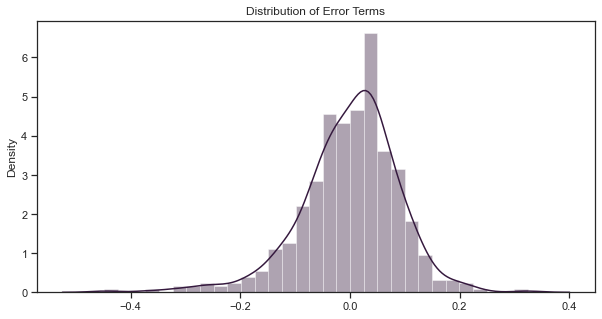

In [165]:
# Ploting of Residuals
plt.figure(figsize = (10,5))
sns.set_style("ticks")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

We can see that the error terms are normally distributed along mean zero. Therefore, model obeys our assumption of normality.

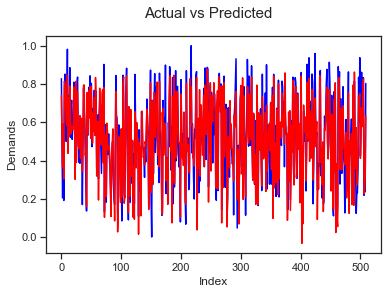

In [166]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [167]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8424023365740138

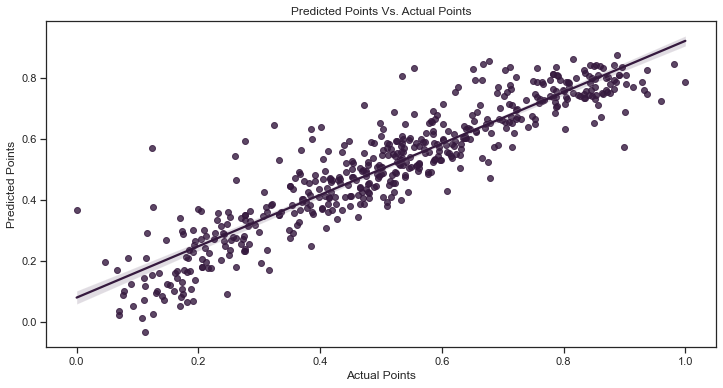

In [168]:
plt.figure(figsize = (12,6))
sns.set_style("ticks")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

In [169]:
num_var = ['temp', 'atemp','hum','windspeed','cnt']

boombikes_df_test[num_var]=scaler.transform(boombikes_df_test[num_var])
boombikes_df_test.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,3,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,4,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,6,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,5,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,6,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,...,0,0,0,0,1,0,0,0,0,0


In [170]:
boombikes_df_test.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,3.100000,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,2.053841,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
y_test = boombikes_df_test.pop('cnt')
X_test = boombikes_df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,1.0,0,1,3,0,0.831783,0.769660,0.657364,0.084219,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,4,1,0.901354,0.842587,0.610133,0.153728,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,6,0,0.511964,0.496145,0.837699,0.334206,0,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,5,1,0.881625,0.795343,0.437098,0.339570,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,6,0,0.817246,0.741471,0.314298,0.537414,0,...,0,0,0,0,1,0,0,0,0,0


In [172]:
X_test_sm = X_test_sm.drop(['Mar','Jun','Aug','Oct','May','hum','atemp'],axis=1)

y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.sample(5)

719    0.347382
367    0.296791
399    0.383544
448    0.571318
621    0.864152
dtype: float64

In [173]:
r2_score(y_test, y_test_pred)

0.8199283018643138

R^2 for training set was around 84.2%.
R^2 for test set is around 82%. After comparing both R^2, there is only a difference of ~2.2% so we can see say that the model has learnt well on the training dataset and is applicable well on the test dataset.

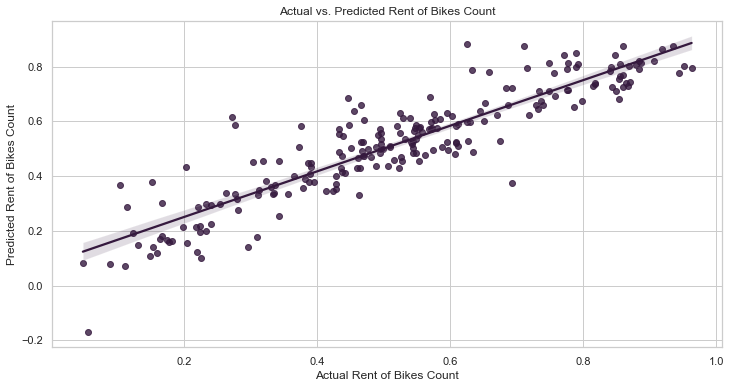

In [174]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

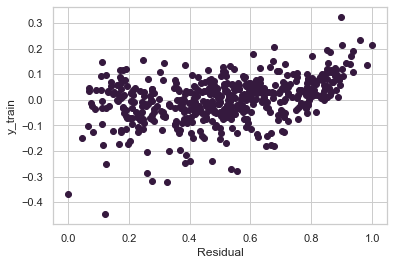

In [175]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Performing Recursive Feature Elimination

In [176]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [177]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 13),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 12),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [178]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'light snow', 'mist', 'Jul', 'Sep'],
      dtype='object')

In [179]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun',
       'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

In [180]:
X_train_lm = X_train[cols]

In [181]:
X_train_lm = sm.add_constant(X_train_lm)

In [182]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [183]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.95e-190
Time:                        21:49:46   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.034      8.258      0.0

- Recursive Feature Elimination, RFE shows a very similar result as to our previous model.
- There is not a very significant difference in the R^2 values.
- p-values of the different features is also very low thus we can go ahead without dropping any other variable.

In [184]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          0.42
const         0.27
yr            0.23
winter        0.09
Sep           0.07
summer        0.03
weekday       0.00
workingday   -0.02
Feb          -0.04
Dec          -0.05
Jul          -0.05
Nov          -0.05
spring       -0.06
Jan          -0.07
mist         -0.08
holiday      -0.11
windspeed    -0.16
light snow   -0.30
dtype: float64

## Final points and conclusion

- Temperature 'temp' is the most significant feature which affects the Business positively.
- For Temperature, coefficient value of ‘0.42’ indicates that a unit increase in temp variable increases the bike hire numbers by 0.42 units.
- Demand of Bike Rent has significantly increased in 2019 compared to 2018 so it is a sign that Boom Bikes is doing good business and increasing revenue.
- For year 'yr', a coefficient value of ‘0.23’ indicated that a unit increase in yr variable increases the bike hire by 0.23 units.
- For windspeed, coefficient value of ‘-0.16’ indicates that a unit increase in windspeed variable decreases the bike hires by 0.16 units.
- For weather and seasons, demand for bikes is more in Winter and summer seasons. When there is snow or mist, demand decreases. A coffecient of -0.30 indicates that a unit increase in light snow decreases bike hire numbers by 0.29 units.